### mctoken visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from glob import glob 

def filter_data(data,label,class_type = [7,12],num_per_class=200,save_bkg=False):

    d = []
    f = []
    if not save_bkg:
        d_ = data[label!=-1]
        f_ = label[label!=-1]
        for i in class_type:
            d_ter = d_[f_==i]
            f_ter = f_[f_==i]
            idx = np.random.randint(0, d_ter.shape[0],(num_per_class,))
            d_ter = d_[f_==i][idx,...]
            f_ter = f_[f_==i][idx,...]
            d.append(d_ter)
            f.append(f_ter)
        
    return np.stack(d,axis=0).reshape(-1,2), np.stack(f,axis=0).reshape(-1,1)[:,0]
        

def visual_tsne(data,label):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i][0]),
                color=plt.cm.Set1(label[i][0] / 10.),
                fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    return fig
def plot_embedding_2d(X, y, title=None):
    """Plot an embedding X with the class label y colored by the domain d."""
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    # Plot colors numbers
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        # plot colored number
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set3(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 10})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from glob import glob 

def plot_mct_representation(root_dir, save_root, cmap=plt.cm.Spectral,methods='more',layer_idx=11):

    save_path = f'{save_root}/{methods}_mctokens_tsne_layer_{layer_idx}.png'
    ls = glob(root_dir)
    mctokens= []
    keys = []

    for i in ls:
        rsv_pro = np.load(i,allow_pickle=True).item()
        key = rsv_pro['keys_gt']
        valid_mct = rsv_pro['mct_tokens'][layer_idx,0,key]
        mctokens.append(valid_mct)
        keys.append(key)

    pro = np.concatenate(mctokens,axis=0).reshape(-1,embed_dim)
    t = np.concatenate(keys,axis=0).reshape(-1,1)[:,0]
    print(pro.shape)
    print(t.shape)

    # label = []
    # for i in range(1,21):
    #     label.append([i]*400)
    # t = np.stack(label,axis=0).reshape(-1,1)[:,0]

    tsne = TSNE(n_components=2,init='pca',random_state=10)
    d = tsne.fit_transform(pro)

    # d,t = filter_data(result,rsv_flag,class_type = [9,11],num_per_class=4000)
    
    # 获取当前的Axes对象
    ax = plt.gca()
    # 设置每个边框的粗细
    ax.spines['top'].set_linewidth(2)    # 设置顶部边框粗细
    ax.spines['right'].set_linewidth(2)  # 设置右侧边框粗细
    ax.spines['left'].set_linewidth(2)   # 设置左侧边框粗细
    ax.spines['bottom'].set_linewidth(2) # 设置底部边框粗细
    plt.rcParams['axes.axisbelow'] = True
    plt.grid('on', ls='--',lw=2.4,alpha=0.5)
    plt.scatter(d[:, 0], d[:, 1], c=t, s=16, cmap=cmap)
    # plt.axis('off')
    plt.savefig(save_path,dpi=500)
    plt.close()

    # plt.show()
    # fig = plot_embedding_2d(d,t)
    # fig = visual_tsne(result,rsv_flag)

if __name__ == '__main__':

    layer_visual = [0,1,2,3,4,5,6,7,8,9,10,11]
    # layer_visual = [11]
    # methods = 'more' 
    methods = 'mctformer_plus'

    cmap = 'OrRd'
    save_root = '/data/PROJECTS/MoRe_2024/codes/MoRe/00_experiments/00sota_76.4_75.0/train_model_iter_18000_visual_mctokens_tsne_all_layers/'
    if methods == 'mctformer_plus':
        root_dir = '/data/PROJECTS/MoRe_2024/codes/MoRe/00_experiments/00sota_76.4_75.0/train_model_iter_18000_visual_mctokens_tsne_all_layers/mctformer_plus_logits/*'
        embed_dim = 384
    elif methods == 'more':
        root_dir = '/data/PROJECTS/MoRe_2024/codes/MoRe/00_experiments/00sota_76.4_75.0/train_model_iter_18000_visual_mctokens_tsne_all_layers/mct_logits/*'
        embed_dim = 768

for i in layer_visual:
    plot_mct_representation(root_dir, save_root, methods=methods,layer_idx=i)

(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)
(2171, 384)
(2171,)


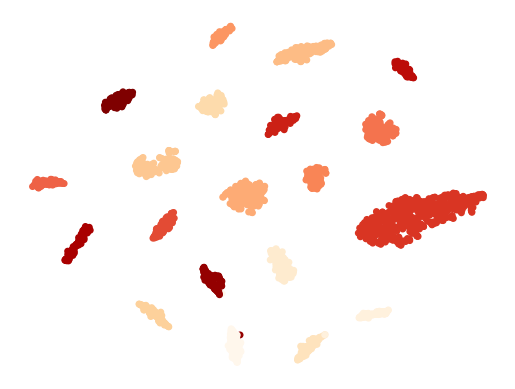

In [2]:
plt.scatter(d[:, 0], d[:, 1], c=t, s=16, cmap='OrRd')
plt.axis('off')
# plt.show()
plt.savefig(save_path,dpi=500)